In [30]:
import triggers
import numpy as np

In [18]:
reload(triggers)

<module 'triggers' from 'triggers.py'>

In [19]:
path = '../dep_data/data/'
base_files = [path+"steps_fb_fs/0_rising/0_rising_2017-09-14-20-22-54.bag",path+"steps_fb_fs/0_rising/0_rising_2017-09-14-20-22-54.bag", path+"steps_fb_sd/0_rising/steps_fb_sd_0_rising_2017-09-14-23-37-30.bag"]
base_times = [(16.828+1505413374.96, 19.395+1505413374.96),(30.919+1505413374.96,33.516+1505413374.96),(37.353+1505425050.4,39.785+1505425050.4)]

fb_base = triggers.getData(base_files[0],base_times[0][0],base_times[0][1])
fs_base = triggers.getData(base_files[1],base_times[1][0],base_times[1][1])
sd_base = triggers.getData(base_files[2],base_times[2][0],base_times[2][1])

In [20]:
trigger_motors,trigger_levels,trigger_edges,indices,phase = triggers.intersections(fb_base[0],fs_base[0])

In [21]:
print trigger_motors,trigger_levels,trigger_edges,indices,phase

[3, 3] [-7636.0, -9203.0] [1, 0] [4, 68] 65


In [22]:
fb_base[0].shape

(128, 14)

Now we have the trigger information fo the motors we are interested in, however we also need to specify trigger levels and edges for the other motors.
Let's write a function to generate these lists.

In [38]:

def getLists(base,time_step):
    motors = [1,3,4,5,10,12] 
    levels = []
    edges = []
    for j in motors:
        levels.append(base[0][time_step,j]/triggers.position_to_rads)
        edges.append((np.sign(base[0][time_step+1,j]-base[0][time_step-1,j])>0)*1)
    return motors, levels, edges

In [39]:
motors, levels, edges = getLists(fb_base,indices[0])
print motors, levels, edges

[1, 3, 4, 5, 10, 12] [-11166.0, -7636.0, 7986.0, -11244.0, 14248.0, 19346.0] [0, 1, 1, 0, 1, 1]


Now we have the required lists, so let's conduct an experiment and gather data regarding the transition from fb to fs with the allegedly 'best' transition

from IPython.display import Image
Image("data/precise_triggering/fb_to_fs_1st.png")

 From the image we can see that there exists a delay between the desired trigger level and the actual trigger level (the actual level would be nearly touching the muscle 5 curve. We can graphically determine the motor position at the moment of transition. At the transition moment, muscle 2 motor position = 0.0616 rad. Comparing with the desired trigger level we can identify the delay which turns out to be 8675 encoder ticks. This is a fairly significant delay.

In [51]:
actual_trigger_level = 0.0616/triggers.position_to_rads
delay = abs(levels[1]-actual_trigger_level)
print actual_trigger_level, delay

1039.2189942 8675.2189942


 The question arises is the delay constant. If so we can adjust the trigger levels easily. The delay duration should be measured. The time delay turns out to be 5 time steps, or 100 ms

In [57]:
initial_index = 4
i = initial_index
while fb_base[0][i,3]/triggers.position_to_rads < actual_trigger_level:
    i += 1
time_delay = fb_base[2][i]-fb_base[2][initial_index]
print i-initial_index, time_delay

5 0.0999763011932


Why is this delay so large? How can we reduce it?
- 3 time step delay introduced from current method of calculating transition 
- what would be a better method of computing this?
- where does the other 2 come from?

Since the muscle behaviors are nearly linear during the segment, let's use muscle value that occur 5 time steps
backwards.

In [61]:
motors_5, levels_5, edges_5 = getLists(fb_base,indices[0]-5)
print motors_5, levels_5, edges_5

 [1, 3, 4, 5, 10, 12] [4127.0, -18438.0, -7475.0, 4140.0, -756.0, 3830.0] [0, 1, 1, 0, 1, 1]


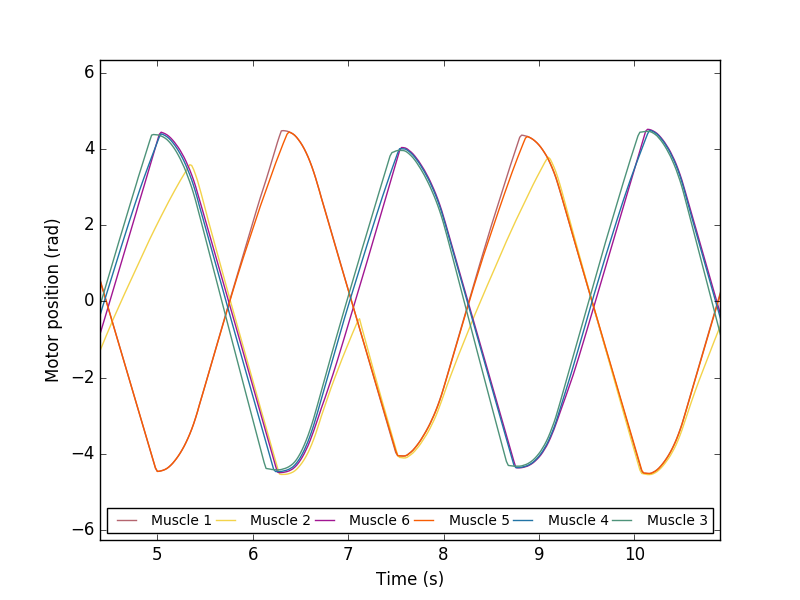

In [62]:
from IPython.display import Image
Image("data/precise_triggering/fb_to_fs_3rd.png")

It is possible to see that the results are significantly improved in terms of timing.
On the downside it should be noted that the amplitude of the first cycle has not been improved.

to do:
- calculate RMS for both fb_to_fs
- conduct same experiment for fb_to_sd

In [66]:
trigger_motors1,trigger_levels1,trigger_edges1,indices1,phase1 = triggers.intersections(fb_base[0],sd_base[0])

In [67]:
print trigger_motors1,trigger_levels1,trigger_edges1,indices1,phase1

[5, 4, 3, 10, 12, 1, 4, 3, 5] [-65362.0, 64864.0, 52441.0, 8057.0, 1408.0, -9896.0, -68150.0, -68927.0, 65737.0] [0, 1, 1, 0, 0, 1, 0, 0, 1] [23, 24, 40, 60, 60, 61, 87, 88, 90] 119


In [68]:
reload(triggers)

[4, 3, 1] [8057.0, 1408.0, -9896.0] [0, 0, 1] [60, 60, 61] 119


<module 'triggers' from 'triggers.py'>

In [ ]:
motors, levels, edges = getLists(fb_base,indices[0]-5)
print motors, levels, edges